Install NLTK, download necessary data, and perform basic corpus analysis including frequency distribution, morphological feature analysis, word cloud generation, and POS tagging

In [1]:
%pip install nltk

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
import string
from nltk.corpus import stopwords

# 1. Define a sample text corpus
corpus = "This is a sample sentence for NLTK analysis. It contains various words and punctuation!"

# 2. Tokenize the corpus
tokens = nltk.word_tokenize(corpus)

# 3. Convert all tokens to lowercase
tokens_lower = [word.lower() for word in tokens]

# 4. Remove punctuation
tokens_no_punct = [word for word in tokens_lower if word not in string.punctuation]

# 5. Remove stop words
stop_words = set(stopwords.words('english'))
tokens_no_stopwords = [word for word in tokens_no_punct if word not in stop_words]

print("Original tokens:", tokens)
print("Lowercase tokens:", tokens_lower)
print("Tokens without punctuation:", tokens_no_punct)
print("Tokens without stopwords:", tokens_no_stopwords)

Original tokens: ['This', 'is', 'a', 'sample', 'sentence', 'for', 'NLTK', 'analysis', '.', 'It', 'contains', 'various', 'words', 'and', 'punctuation', '!']
Lowercase tokens: ['this', 'is', 'a', 'sample', 'sentence', 'for', 'nltk', 'analysis', '.', 'it', 'contains', 'various', 'words', 'and', 'punctuation', '!']
Tokens without punctuation: ['this', 'is', 'a', 'sample', 'sentence', 'for', 'nltk', 'analysis', 'it', 'contains', 'various', 'words', 'and', 'punctuation']
Tokens without stopwords: ['sample', 'sentence', 'nltk', 'analysis', 'contains', 'various', 'words', 'punctuation']


Most common words and their frequencies:
[('sample', 1), ('sentence', 1), ('nltk', 1), ('analysis', 1), ('contains', 1), ('various', 1), ('words', 1), ('punctuation', 1)]


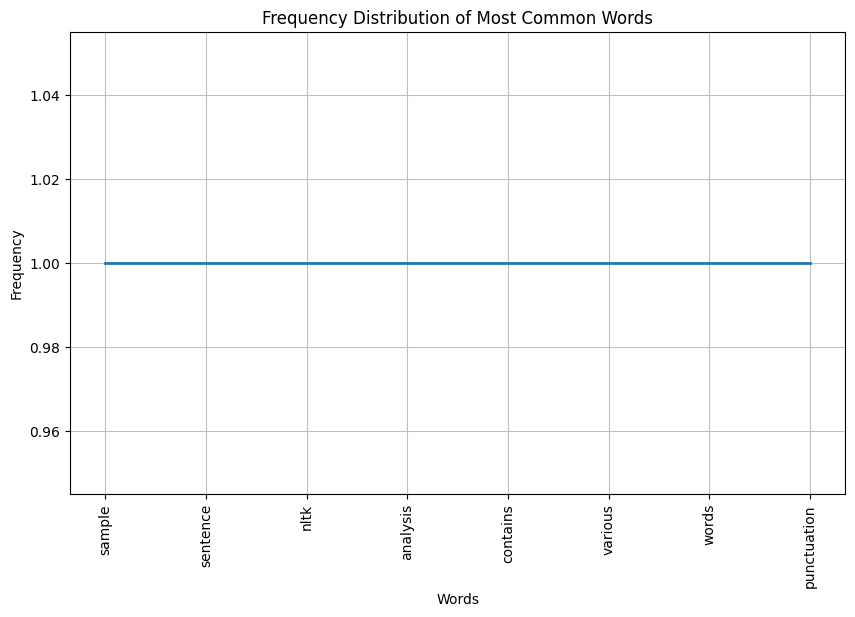

In [6]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Create a FreqDist object
fdist = FreqDist(tokens_no_stopwords)

# Print the most common words
print("Most common words and their frequencies:")
print(fdist.most_common(10))

# Plot the frequency distribution of the most common words
plt.figure(figsize=(10, 6))
fdist.plot(10, cumulative=False)
plt.title('Frequency Distribution of Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

## Morphological feature analysis

Perform morphological analysis (e.g., stemming or lemmatization) and analyze the results.


In [7]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

# Apply stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in tokens_no_stopwords]

print("Original words and their stemmed versions:")
for original, stemmed in zip(tokens_no_stopwords, stemmed_words):
    print(f"Original: {original}, Stemmed: {stemmed}")

# Apply lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word, pos='n') for word in tokens_no_stopwords]

print("\nOriginal words and their lemmatized versions:")
for original, lemmatized in zip(tokens_no_stopwords, lemmatized_words):
    print(f"Original: {original}, Lemmatized: {lemmatized}")

Original words and their stemmed versions:
Original: sample, Stemmed: sampl
Original: sentence, Stemmed: sentenc
Original: nltk, Stemmed: nltk
Original: analysis, Stemmed: analysi
Original: contains, Stemmed: contain
Original: various, Stemmed: variou
Original: words, Stemmed: word
Original: punctuation, Stemmed: punctuat

Original words and their lemmatized versions:
Original: sample, Lemmatized: sample
Original: sentence, Lemmatized: sentence
Original: nltk, Lemmatized: nltk
Original: analysis, Lemmatized: analysis
Original: contains, Lemmatized: contains
Original: various, Lemmatized: various
Original: words, Lemmatized: word
Original: punctuation, Lemmatized: punctuation


## Word cloud generation

Generate and display a word cloud based on the corpus data.


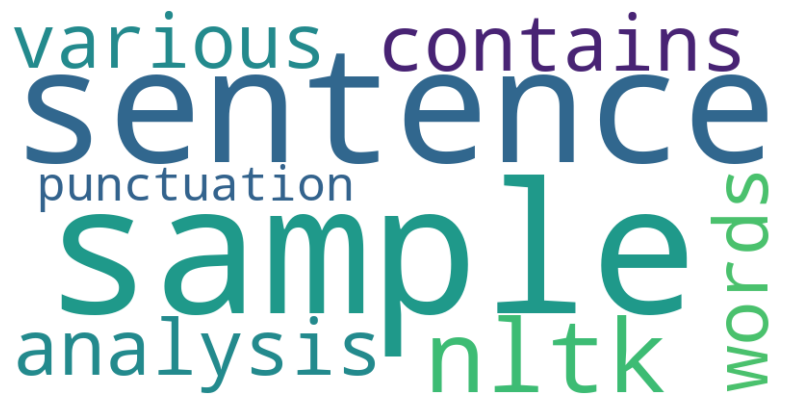

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a single string of text from the preprocessed tokens
text = " ".join(tokens_no_stopwords)

# Instantiate a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Pos tagging

Perform part-of-speech tagging on the corpus data and analyze the results.


In [10]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [11]:
from nltk import pos_tag

# Apply POS tagging to the original tokens
pos_tags = pos_tag(tokens)

# Print the resulting list of tuples
print("Tokens with POS tags:")
print(pos_tags)

# Briefly analyze and describe the types of POS tags observed
print("\nAnalysis of POS tags:")
print("The POS tags observed in the output represent the grammatical category of each token in the original corpus.")
print("Based on the Penn Treebank tag set (commonly used by NLTK), we can interpret some of the tags:")
print("- 'DT': Determiner (e.g., 'a', 'the')")
print("- 'NN': Noun, singular or mass (e.g., 'sentence', 'analysis')")
print("- 'VBZ': Verb, third person singular present (e.g., 'contains')")
print("- 'NNS': Noun, plural (e.g., 'words')")
print("- 'CC': Coordinating conjunction (e.g., 'and')")
print("- '.': Punctuation mark, terminal (e.g., '.')")
print("- '!': Punctuation mark, terminal (e.g., '!')")
print("These tags help in understanding the syntactic structure of the sentence and the role of each word.")

Tokens with POS tags:
[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('sentence', 'NN'), ('for', 'IN'), ('NLTK', 'NNP'), ('analysis', 'NN'), ('.', '.'), ('It', 'PRP'), ('contains', 'VBZ'), ('various', 'JJ'), ('words', 'NNS'), ('and', 'CC'), ('punctuation', 'NN'), ('!', '.')]

Analysis of POS tags:
The POS tags observed in the output represent the grammatical category of each token in the original corpus.
Based on the Penn Treebank tag set (commonly used by NLTK), we can interpret some of the tags:
- 'DT': Determiner (e.g., 'a', 'the')
- 'NN': Noun, singular or mass (e.g., 'sentence', 'analysis')
- 'VBZ': Verb, third person singular present (e.g., 'contains')
- 'NNS': Noun, plural (e.g., 'words')
- 'CC': Coordinating conjunction (e.g., 'and')
- '.': Punctuation mark, terminal (e.g., '.')
- '!': Punctuation mark, terminal (e.g., '!')
These tags help in understanding the syntactic structure of the sentence and the role of each word.


## Summary:

### Data Analysis Key Findings

*   The NLTK library and necessary data resources ('punkt', 'averaged\_perceptron\_tagger', 'wordnet', and 'stopwords') were successfully installed and downloaded.
*   The sample corpus was successfully preprocessed by tokenizing, converting to lowercase, removing punctuation, and removing stopwords.
*   The frequency distribution of the preprocessed words was calculated, showing a frequency of 1 for all words in the sample corpus.
*   Morphological analysis using stemming reduced words to their root form (e.g., "sentence" to "sentenc"), while lemmatization, when specified as a noun POS, lemmatized "words" to "word" and left others unchanged.
*   A word cloud was successfully generated from the preprocessed text data.
*   Part-of-speech tagging was successfully applied to the original tokens, providing grammatical tags based on the Penn Treebank tag set (e.g., 'DT', 'NN', 'VBZ').
